In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
pd.pandas.set_option('display.max_columns',None)

In [9]:
df=pd.read_csv("churn.csv")
df

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,4999,DC,area_code_510,109,no,0,no,8.5,6,2.30,188.8,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


In [10]:
df.drop(columns="Unnamed: 0",inplace=True)
df

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,DC,area_code_510,109,no,0,no,8.5,6,2.30,188.8,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


In [11]:
## there is no need for the unnamed column because it contains serial numbers so we need to drop that column 

In [12]:
df.describe()

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,10.261780,4.435200,2.771196,180.288900,100.029400,100.191000,17.054322,200.391620,99.919200,9.017732,1.570400
std,39.69456,13.546393,2.761396,2.456788,0.745514,53.894699,19.831197,19.826496,4.296843,50.527789,19.958686,2.273763,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,8.500000,3.000000,2.300000,143.700000,87.000000,87.000000,14.140000,166.900000,87.000000,7.510000,1.000000
50%,100.00000,0.000000,10.300000,4.000000,2.780000,180.100000,100.000000,100.000000,17.090000,200.400000,100.000000,9.020000,1.000000
75%,127.00000,17.000000,12.000000,6.000000,3.240000,216.200000,113.000000,114.000000,19.900000,234.700000,113.000000,10.560000,2.000000
max,243.00000,52.000000,20.000000,20.000000,5.400000,351.500000,165.000000,170.000000,30.910000,395.000000,175.000000,17.770000,9.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   object 
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   object 
 4   voice.messages  5000 non-null   int64  
 5   intl.plan       5000 non-null   object 
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   int64  
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      5000 non-null   object 
 12  eve.mins        5000 non-null   object 
 13  eve.calls       5000 non-null   int64  
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   f

In [14]:
df.dtypes

state              object
area.code          object
account.length      int64
voice.plan         object
voice.messages      int64
intl.plan          object
intl.mins         float64
intl.calls          int64
intl.charge       float64
day.mins          float64
day.calls           int64
day.charge         object
eve.mins           object
eve.calls           int64
eve.charge        float64
night.mins        float64
night.calls         int64
night.charge      float64
customer.calls      int64
churn              object
dtype: object

In [15]:
df.isnull().sum()
##here two columns contains missing values but it has the object data type so it didnot show any missing values so we need to change the data type for those columns

state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64

In [16]:
df[["day.charge","eve.mins"]]=df[["day.charge","eve.mins"]].apply(pd.to_numeric,errors="coerce")

In [17]:
df.isnull().sum()

state              0
area.code          0
account.length     0
voice.plan         0
voice.messages     0
intl.plan          0
intl.mins          0
intl.calls         0
intl.charge        0
day.mins           0
day.calls          0
day.charge         7
eve.mins          24
eve.calls          0
eve.charge         0
night.mins         0
night.calls        0
night.charge       0
customer.calls     0
churn              0
dtype: int64

<Axes: >

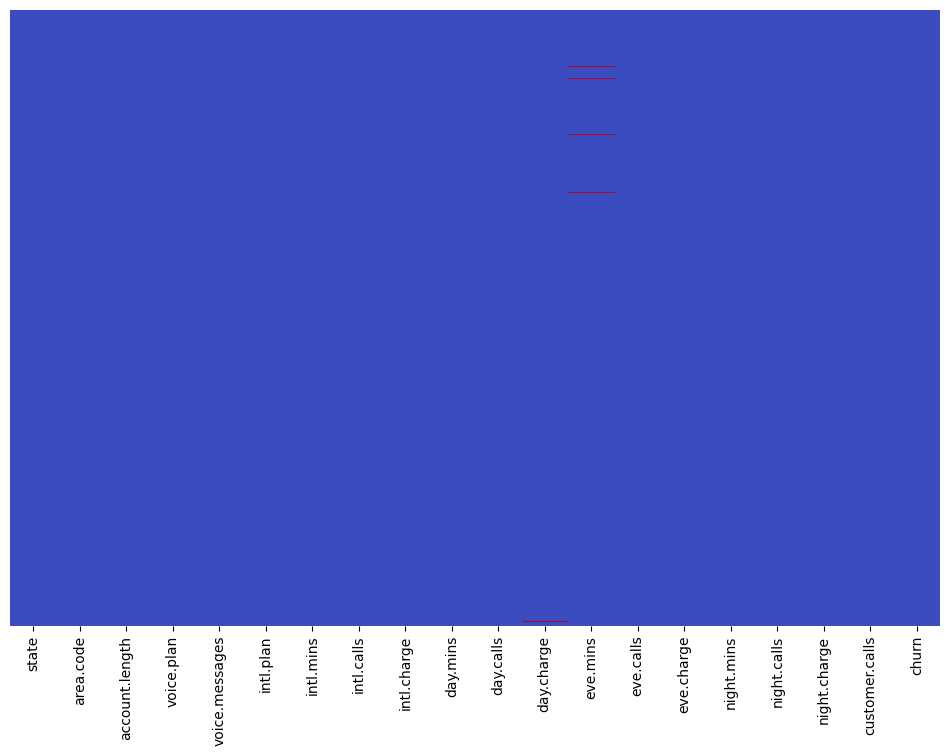

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),yticklabels=False,cmap="coolwarm", cbar=False,)

In [19]:
df["day.charge"]=df["day.charge"].fillna(df['day.charge'].median())
df["eve.mins"]=df["eve.mins"].fillna(df['eve.mins'].median())

In [20]:
df.isnull().sum()

state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64

In [21]:
cat_col=df.columns[df.dtypes=='O']
num_col=df.columns[df.dtypes!='O']
print(cat_col,num_col)

Index(['state', 'area.code', 'voice.plan', 'intl.plan', 'churn'], dtype='object') Index(['account.length', 'voice.messages', 'intl.mins', 'intl.calls',
       'intl.charge', 'day.mins', 'day.calls', 'day.charge', 'eve.mins',
       'eve.calls', 'eve.charge', 'night.mins', 'night.calls', 'night.charge',
       'customer.calls'],
      dtype='object')


In [22]:
df.duplicated().sum()

0

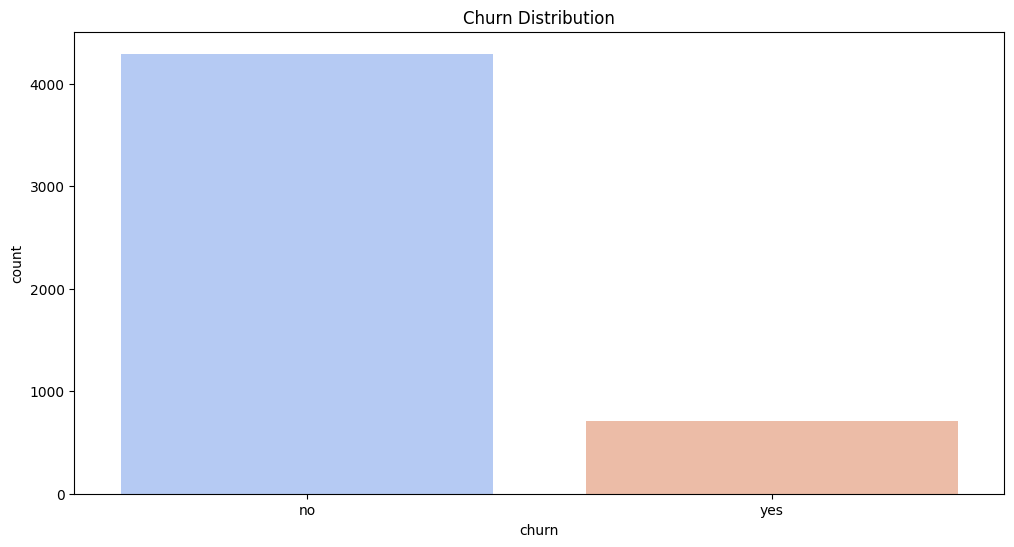

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(x='churn', data=df, palette='coolwarm')
plt.title('Churn Distribution')
plt.show()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(1, 0, 'account.length'),
  Text(2, 0, 'voice.messages'),
  Text(3, 0, 'intl.mins'),
  Text(4, 0, 'intl.calls'),
  Text(5, 0, 'intl.charge'),
  Text(6, 0, 'day.mins'),
  Text(7, 0, 'day.calls'),
  Text(8, 0, 'day.charge'),
  Text(9, 0, 'eve.mins'),
  Text(10, 0, 'eve.calls'),
  Text(11, 0, 'eve.charge'),
  Text(12, 0, 'night.mins'),
  Text(13, 0, 'night.calls'),
  Text(14, 0, 'night.charge'),
  Text(15, 0, 'customer.calls')])

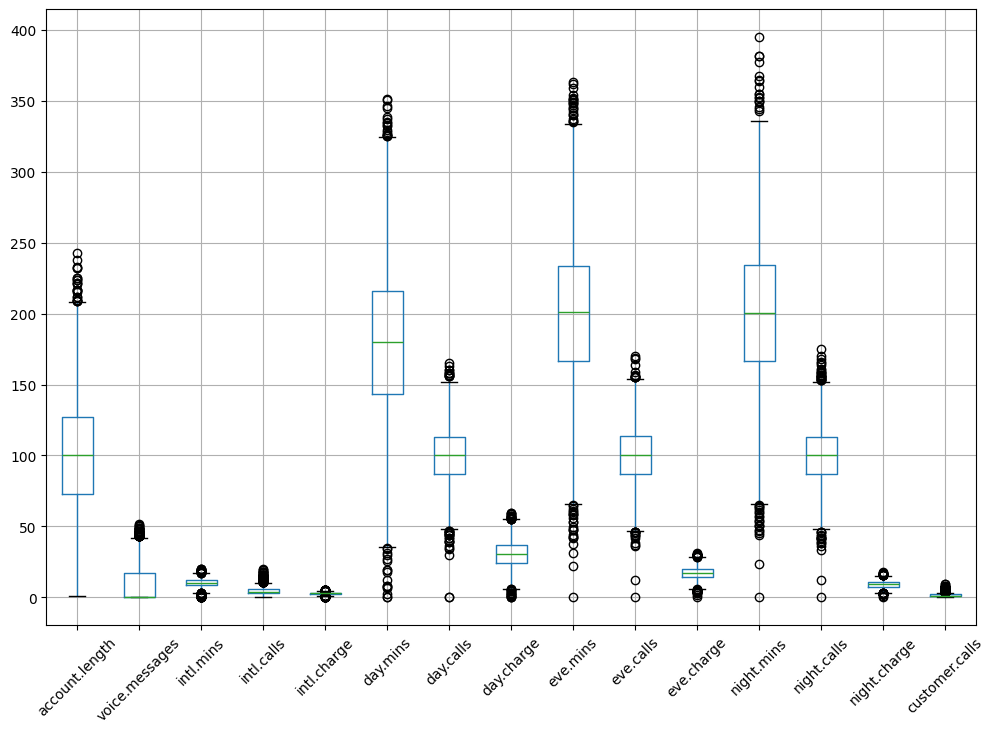

In [24]:

plt.figure(figsize=(12,8))
df.boxplot()
plt.xticks(rotation=45)

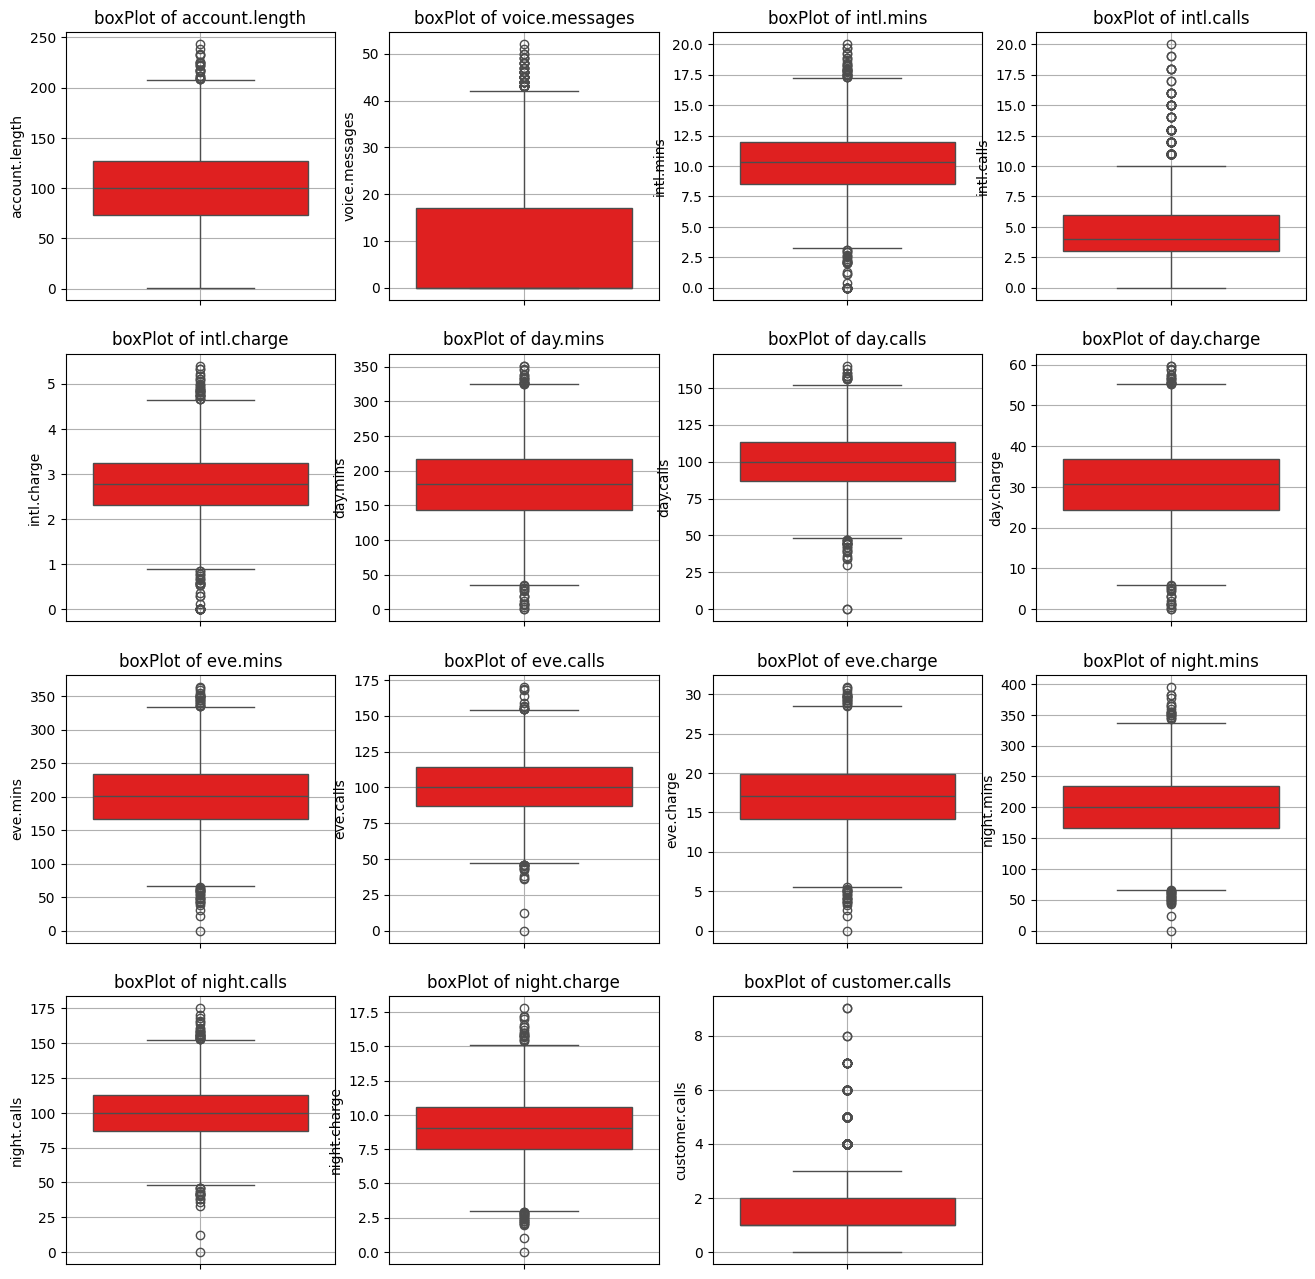

In [25]:
plt.figure(figsize=(16,16))
for i,col in enumerate(num_col,1):
    plt.subplot(4,4,i)
    sns.boxplot(df[col],color="red")
    plt.title(f"boxPlot of {col}")
    plt.grid()

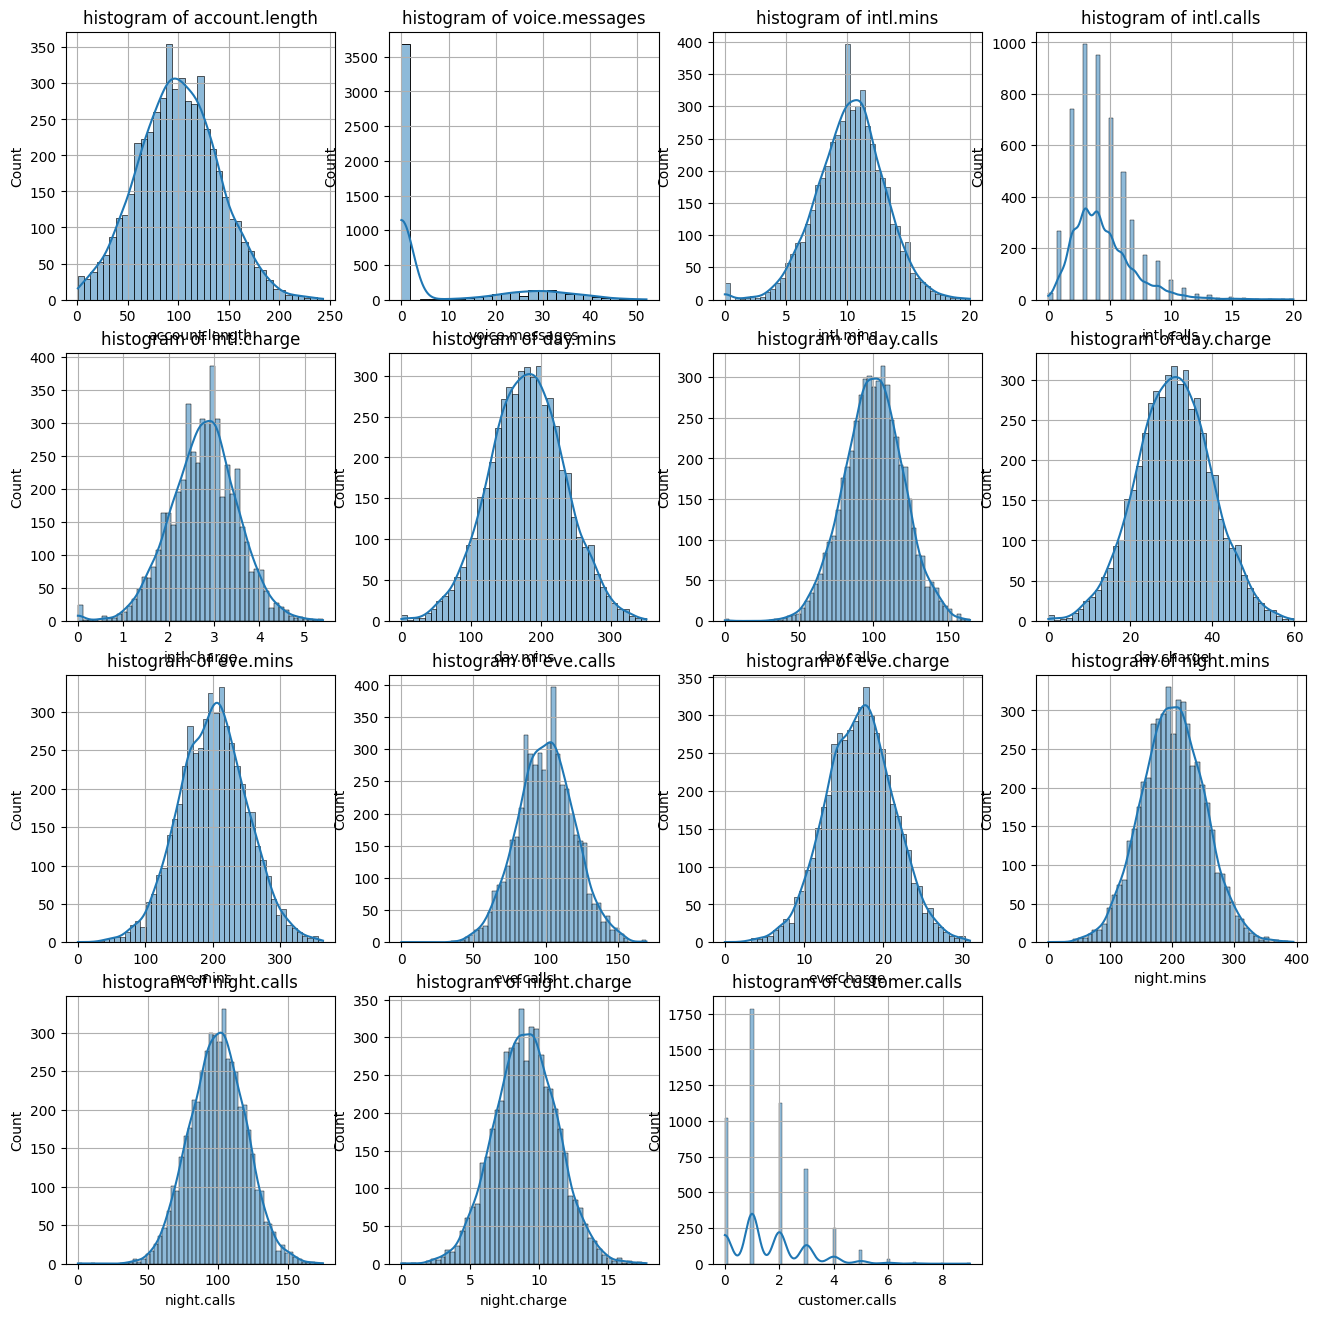

In [26]:
### data distribution using histogram 
plt.figure(figsize=(16,16))
for i,col in enumerate(num_col,1):
    plt.subplot(4,4,i)
    sns.histplot(df[col],kde=True)
    plt.title(f"histogram of {col}")
    plt.grid()

In [27]:
import numpy as np

# Function to remove outliers using IQR
def remove_outliers_iqr(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

for col in num_col:
    df=remove_outliers_iqr(df,col)

In [28]:
df

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
5,AL,area_code_510,118,no,0,yes,6.3,6,1.70,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,NC,area_code_408,75,no,0,no,6.9,7,1.86,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,1,no
4995,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,no
4996,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,no


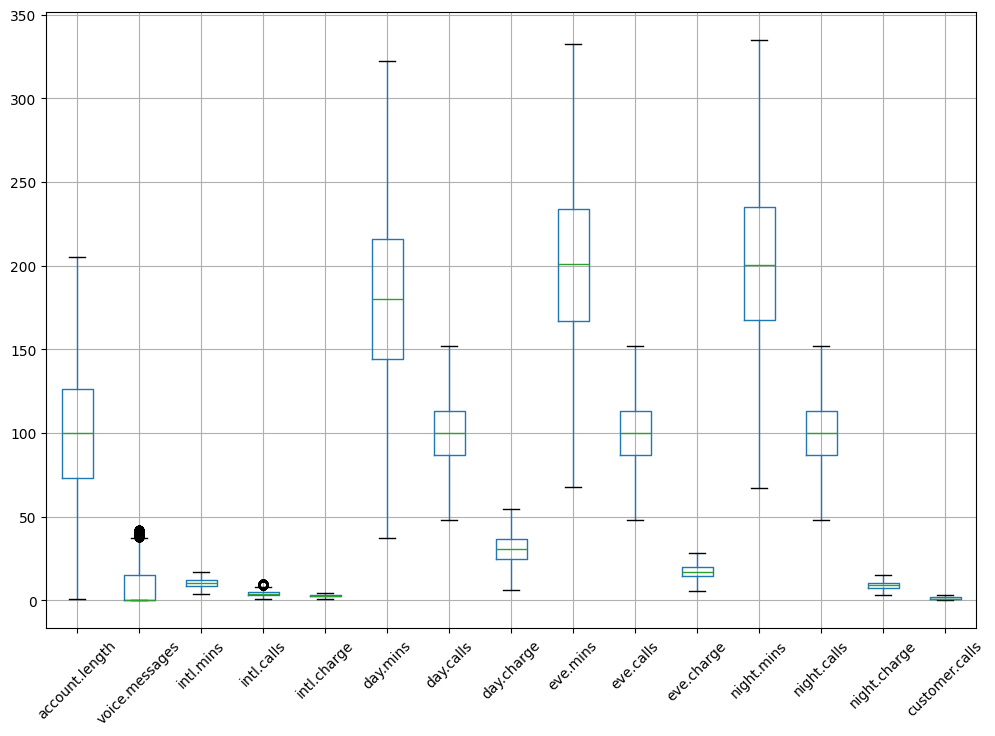

In [29]:
plt.figure(figsize=(12,8))
df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [30]:
 df['voice.messages']= np.log1p(df['voice.messages'])

In [31]:
 df['intl.calls']= np.log1p(df['intl.calls'])
df.head()


,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,128,yes,3.258097,no,10.0,1.386294,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,3.295837,no,13.7,1.386294,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0.000000,no,12.2,1.791759,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
4,OK,area_code_415,75,no,0.000000,yes,10.1,1.386294,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
5,AL,area_code_510,118,no,0.000000,yes,6.3,1.945910,1.70,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,0,no


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(1, 0, 'account.length'),
  Text(2, 0, 'voice.messages'),
  Text(3, 0, 'intl.mins'),
  Text(4, 0, 'intl.calls'),
  Text(5, 0, 'intl.charge'),
  Text(6, 0, 'day.mins'),
  Text(7, 0, 'day.calls'),
  Text(8, 0, 'day.charge'),
  Text(9, 0, 'eve.mins'),
  Text(10, 0, 'eve.calls'),
  Text(11, 0, 'eve.charge'),
  Text(12, 0, 'night.mins'),
  Text(13, 0, 'night.calls'),
  Text(14, 0, 'night.charge'),
  Text(15, 0, 'customer.calls')])

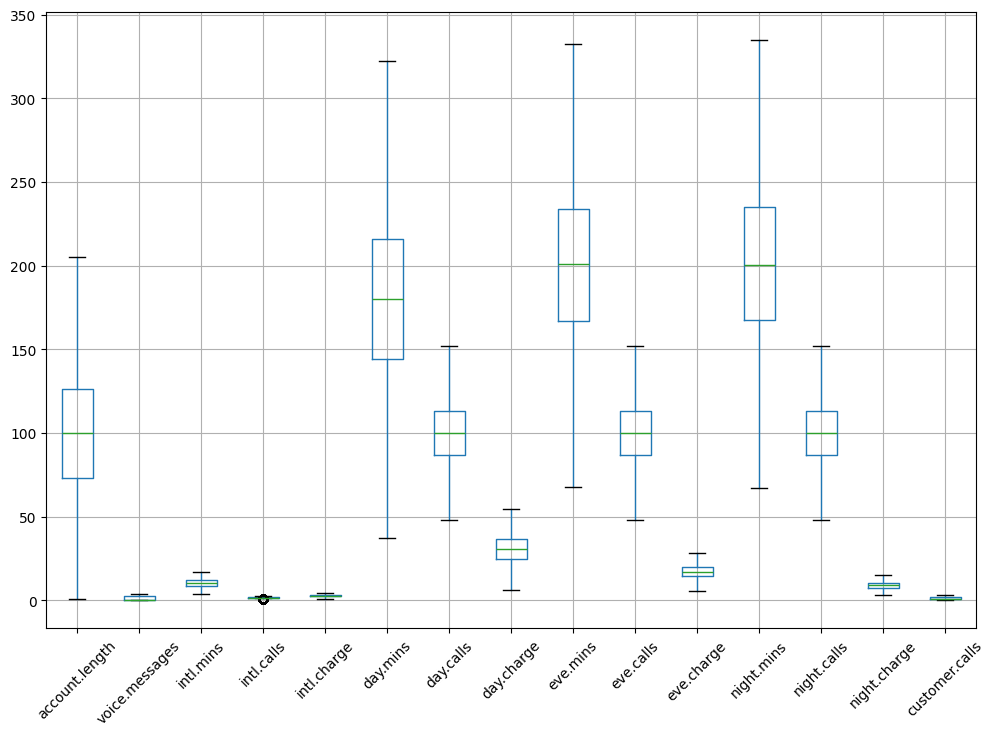

In [32]:
plt.figure(figsize=(12,8))
df.boxplot()
plt.xticks(rotation=45)

In [33]:
print(df[num_col].skew())

account.length    0.020324
voice.messages    1.134084
intl.mins        -0.057810
intl.calls       -0.220650
intl.charge      -0.057769
day.mins         -0.010274
day.calls         0.021486
day.charge       -0.011320
eve.mins          0.011297
eve.calls         0.019684
eve.charge        0.012956
night.mins        0.004704
night.calls      -0.028464
night.charge      0.004727
customer.calls    0.273685
dtype: float64


<Axes: >

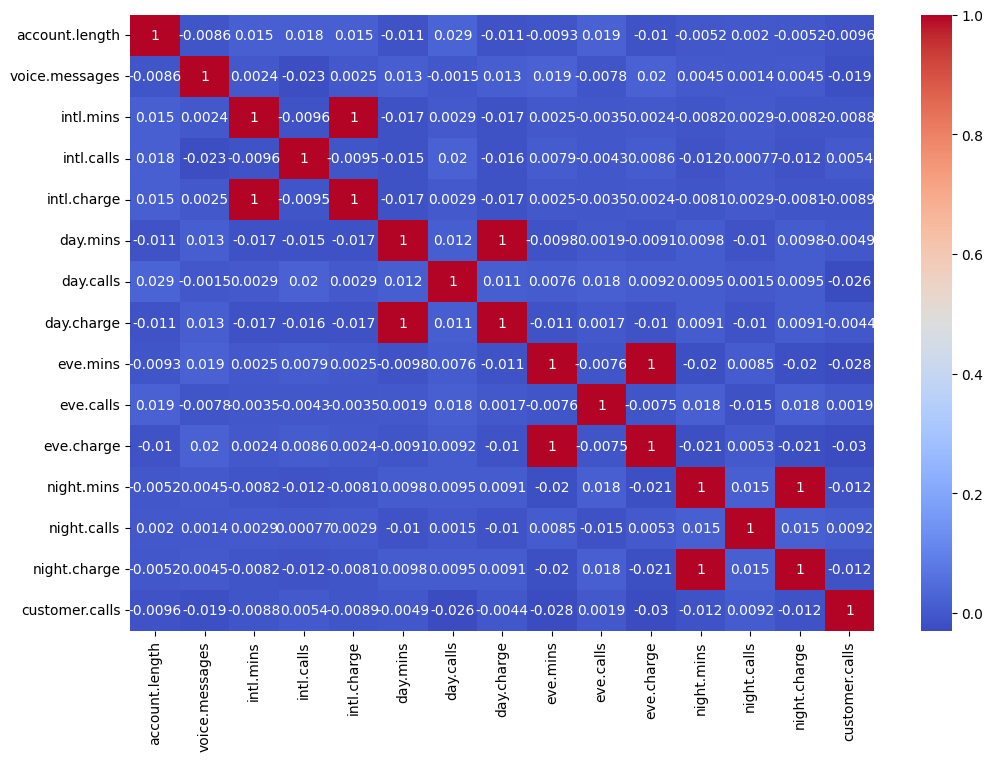

In [34]:
corr=df[num_col].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,cmap="coolwarm",annot=True)

In [35]:
def find_multicollinear_features(dataset, threshold=0.8):
    r = dataset.corr()  # Compute correlation matrix
    col_corr = set()  # Store highly correlated columns
    
    for i in range(len(r.columns)):
        for j in range(i):
            if abs(r.iloc[i, j]) > threshold:  # Check correlation magnitude
                col_name = r.columns[i]
                col_corr.add(col_name)  # Add column to set
                
    return col_corr  # Return the set of highly correlated columns

In [36]:
high_corr_features = find_multicollinear_features(df[num_col], 0.7)
print("Columns to Drop:", high_corr_features)

Columns to Drop: {'intl.charge', 'eve.charge', 'day.charge', 'night.charge'}


In [37]:
df.drop(columns=['day.charge', 'intl.charge', 'night.charge', 'eve.charge'],inplace=True)

In [38]:
df

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls,churn
0,KS,area_code_415,128,yes,3.258097,no,10.0,1.386294,265.1,110,197.4,99,244.7,91,1,no
1,OH,area_code_415,107,yes,3.295837,no,13.7,1.386294,161.6,123,195.5,103,254.4,103,1,no
2,NJ,area_code_415,137,no,0.000000,no,12.2,1.791759,243.4,114,121.2,110,162.6,104,0,no
4,OK,area_code_415,75,no,0.000000,yes,10.1,1.386294,166.7,113,148.3,122,186.9,121,3,no
5,AL,area_code_510,118,no,0.000000,yes,6.3,1.945910,223.4,98,220.6,101,203.9,118,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,NC,area_code_408,75,no,0.000000,no,6.9,2.079442,170.7,101,193.1,126,129.1,104,1,no
4995,HI,area_code_408,50,yes,3.713572,no,9.9,1.791759,235.7,127,223.0,126,297.5,116,2,no
4996,WV,area_code_415,152,no,0.000000,no,14.7,1.098612,184.2,90,256.8,73,213.6,113,3,yes
4997,DC,area_code_415,61,no,0.000000,no,13.6,1.609438,140.6,89,172.8,128,212.4,97,1,no


<Axes: >

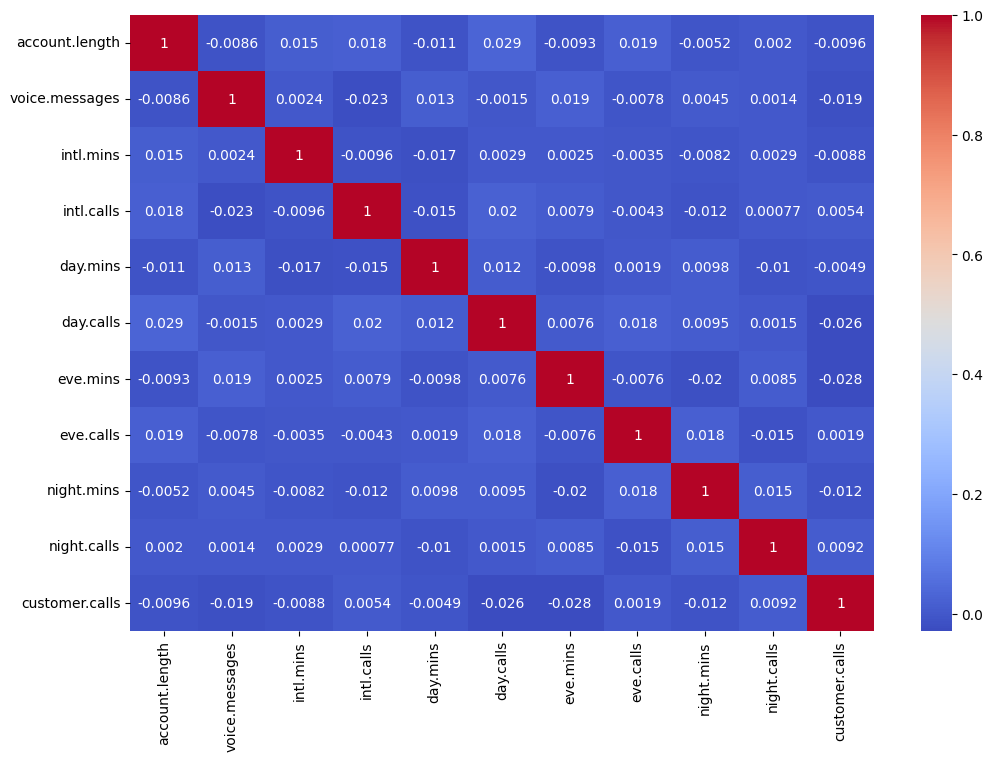

In [39]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=['number']).corr(),cmap="coolwarm",annot=True)

In [40]:
num_col_af=df.columns[df.dtypes!="O"]
df[num_col_af].dtypes

account.length      int64
voice.messages    float64
intl.mins         float64
intl.calls        float64
day.mins          float64
day.calls           int64
eve.mins          float64
eve.calls           int64
night.mins        float64
night.calls         int64
customer.calls      int64
dtype: object

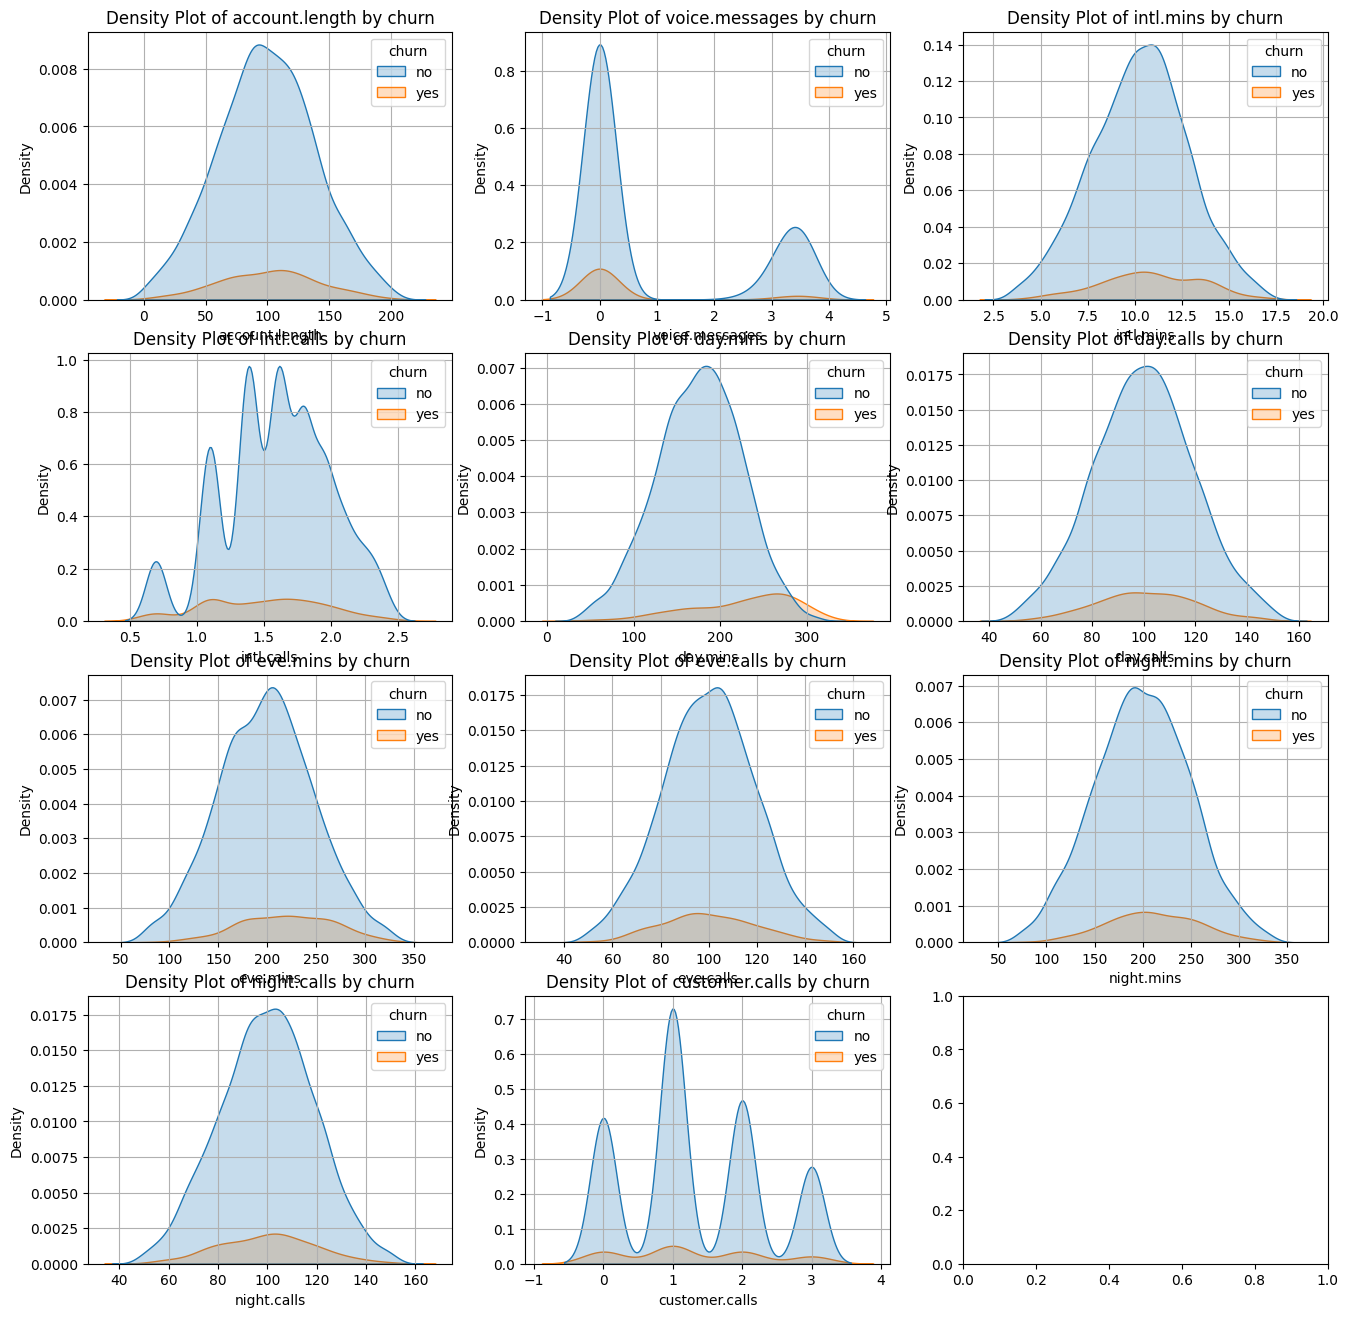

In [41]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,16))
axes = axes.flatten()


for i, col in enumerate(num_col_af):
    sns.kdeplot(data=df, x=col, hue=df['churn'], fill=True, ax=axes[i])
    axes[i].set_title(f"Density Plot of {col} by {'churn'}")
    axes[i].grid()

In [42]:
## sns.pairplot(df)

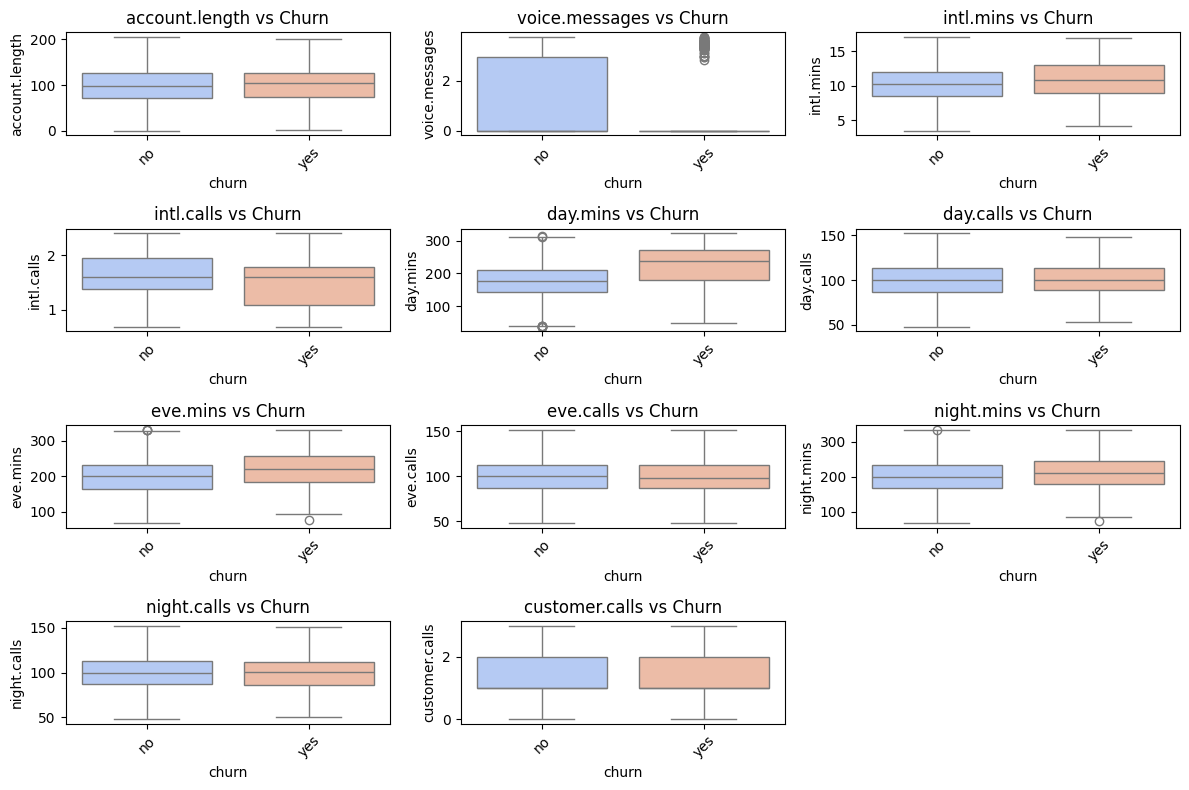

In [43]:
plt.figure(figsize=(12,8))
for i, column in enumerate(num_col_af, 1):
    plt.subplot(4,3, i)
    sns.boxplot(x=df['churn'], y=df[column], palette='coolwarm')
    plt.title(f"{column} vs Churn")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
## encoding techniques
df = pd.get_dummies(df, columns=['state'], drop_first=True)


In [45]:
## scaling for numerical columns 
from sklearn.preprocessing import StandardScaler,LabelEncoder
scal=StandardScaler()
lab=LabelEncoder()
df[num_col_af]=scal.fit_transform(df[num_col_af])
## labeling for catagorical columns and target column
for col in df[['voice.plan', 'intl.plan', 'churn', 'area.code']]:
   df[col]=lab.fit_transform(df[col])


In [46]:
df

,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls,churn,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,1,0.724828,1,1.623393,0,-0.122703,-0.491252,1.626868,0.520266,-0.066709,-0.059655,0.904558,-0.460120,-0.324315,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1,0.189029,1,1.649000,0,1.325966,-0.491252,-0.356064,1.197429,-0.105773,0.148432,1.103155,0.165488,-0.324315,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,1,0.954456,0,-0.587272,0,0.738668,0.516931,1.211123,0.728624,-1.633384,0.512584,-0.776350,0.217622,-1.346947,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,1,-0.627427,0,-0.587272,1,-0.083550,-0.491252,-0.258354,0.676534,-1.076207,1.136844,-0.278834,1.103900,1.720948,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,2,0.469686,0,-0.587272,1,-1.571371,0.900224,0.827948,-0.104809,0.410285,0.044389,0.069223,0.947498,-1.346947,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,0,-0.627427,0,-0.587272,0,-1.336452,1.232247,-0.181719,0.051460,-0.155117,1.344930,-1.462226,0.217622,-0.324315,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4995,0,-1.265284,1,1.932439,0,-0.161856,0.516931,1.063601,1.405788,0.459629,1.344930,1.985581,0.843230,0.698316,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,1,1.337170,0,-0.587272,0,1.717498,-1.206568,0.076924,-0.521525,1.154558,-1.412218,0.267820,0.686828,1.720948,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [47]:
### model building 

In [48]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [49]:
x=df.drop(columns="churn")
y=df["churn"]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

### logistic regression model 

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report,confusion_matrix

log_model = LogisticRegression()
log_model.fit(x_train, y_train)
y_pred_log = log_model.predict(x_test)

print("\nLogistic Regression Performance:\n", classification_report(y_test, y_pred_log))
accuracy_score_log=accuracy_score(y_test, y_pred_log)
print("Accuracy:",accuracy_score_log)



Logistic Regression Performance:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       735
           1       0.63      0.31      0.42        93

    accuracy                           0.90       828
   macro avg       0.77      0.64      0.68       828
weighted avg       0.89      0.90      0.89       828

Accuracy: 0.9021739130434783


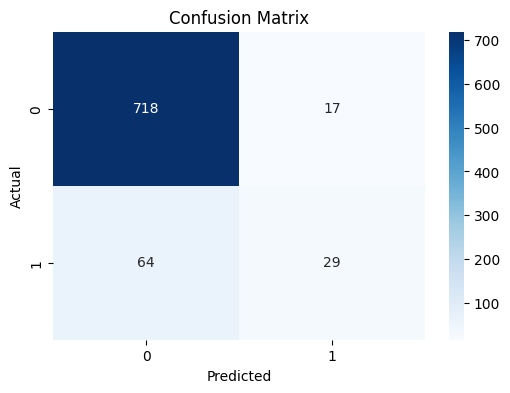

In [51]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## random forest model 

In [52]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

print("\nRandom Forest Performance:\n", classification_report(y_test, y_pred_rf))
accuracy_score_rf=accuracy_score(y_test, y_pred_rf)
print("Accuracy:",accuracy_score_rf)



Random Forest Performance:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       735
           1       0.98      0.51      0.67        93

    accuracy                           0.94       828
   macro avg       0.96      0.75      0.82       828
weighted avg       0.95      0.94      0.94       828

Accuracy: 0.9432367149758454


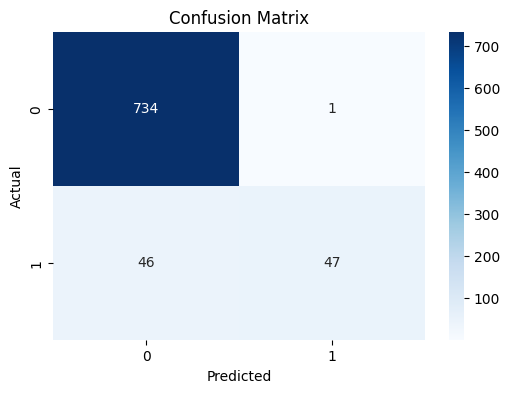

In [53]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### decision tree model

In [54]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

print("\nDecision Tree Performance:\n", classification_report(y_test, y_pred_dt))
accuracy_score_dt=accuracy_score(y_test, y_pred_dt)
print("Accuracy:",accuracy_score_dt)


Decision Tree Performance:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       735
           1       0.67      0.62      0.64        93

    accuracy                           0.92       828
   macro avg       0.81      0.79      0.80       828
weighted avg       0.92      0.92      0.92       828

Accuracy: 0.9227053140096618


#### hyper parameter tuning


## xgboost model

In [55]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)

print("\nXGBoost Performance:\n", classification_report(y_test, y_pred_xgb))
accuracy_score_xgb=accuracy_score(y_test, y_pred_xgb)
print("Accuracy:",accuracy_score_xgb)



XGBoost Performance:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       735
           1       0.90      0.66      0.76        93

    accuracy                           0.95       828
   macro avg       0.93      0.82      0.87       828
weighted avg       0.95      0.95      0.95       828

Accuracy: 0.9528985507246377


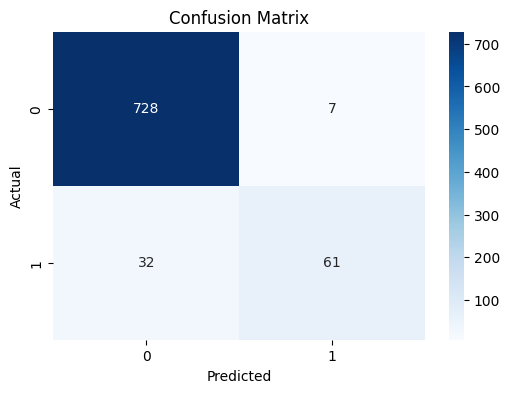

In [56]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### support vector machine

In [57]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)

print("\nSVM Performance:\n", classification_report(y_test, y_pred_svm))
accuracy_score_svm=accuracy_score(y_test, y_pred_svm)
print("Accuracy:",accuracy_score_rf)




SVM Performance:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96       735
           1       0.86      0.34      0.49        93

    accuracy                           0.92       828
   macro avg       0.89      0.67      0.72       828
weighted avg       0.92      0.92      0.90       828

Accuracy: 0.9432367149758454


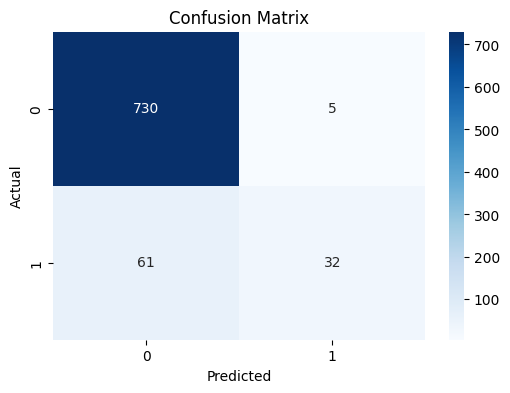

In [58]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test,y_pred_svm), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### KNN model 

In [59]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)

print("\nKNN Performance:\n", classification_report(y_test, y_pred_knn))
accuracy_score_knn=accuracy_score(y_test, y_pred_knn)
print("Accuracy:",accuracy_score_knn)




KNN Performance:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       735
           1       0.81      0.18      0.30        93

    accuracy                           0.90       828
   macro avg       0.86      0.59      0.62       828
weighted avg       0.90      0.90      0.88       828

Accuracy: 0.9033816425120773


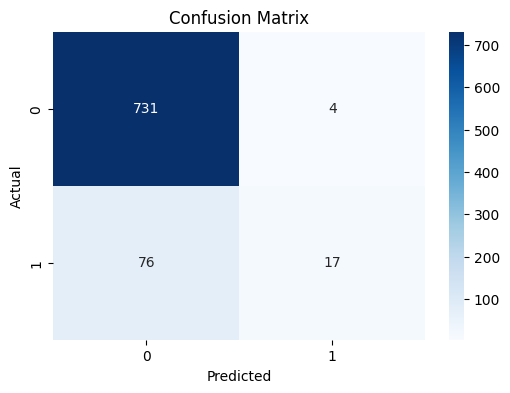

In [60]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## gradient boosting model

In [61]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.9, max_depth=5, random_state=42)
gb_model.fit(x_train, y_train)
y_pred_gb = gb_model.predict(x_test)

print("\nGradient Boosting Performance:\n", classification_report(y_test, y_pred_gb))
accuracy_score_gb=accuracy_score(y_test, y_pred_gb)
print("Accuracy:",accuracy_score_gb)


Gradient Boosting Performance:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       735
           1       0.77      0.65      0.70        93

    accuracy                           0.94       828
   macro avg       0.86      0.81      0.83       828
weighted avg       0.94      0.94      0.94       828

Accuracy: 0.9384057971014492


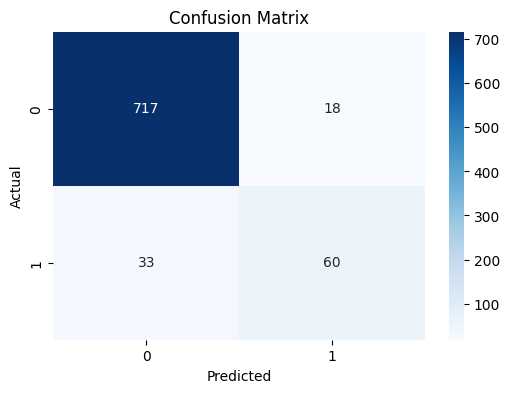

In [62]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [63]:
accuracy_scores={
    'Random Forest':accuracy_score_rf,
    'Xgboost':accuracy_score_xgb,
    'K nearest neigbour':accuracy_score_knn,
    'Logistic regression':accuracy_score_log,
    'Decision Tree':accuracy_score_dt,
    'Support vector classifier':accuracy_score_svm,
    'gradientboost classifier':accuracy_score_gb
}

In [64]:
res=sorted(accuracy_scores.items(),key=lambda x:x[1],reverse=True)
for name,value in res:
    print(name,'model accuracy :',value,"\n")

Xgboost model accuracy : 0.9528985507246377 

Random Forest model accuracy : 0.9432367149758454 

gradientboost classifier model accuracy : 0.9384057971014492 

Decision Tree model accuracy : 0.9227053140096618 

Support vector classifier model accuracy : 0.9202898550724637 

K nearest neigbour model accuracy : 0.9033816425120773 

Logistic regression model accuracy : 0.9021739130434783 



### hyper parameter tuning

In [65]:
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE

In [66]:
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

### Logistic Regression Tuning

In [67]:
# Logistic Regression Tuning
log_params = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs'], 'penalty': ['l1', 'l2']}
log_grid = RandomizedSearchCV(LogisticRegression(random_state=42), log_params, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
log_grid.fit(x_train_resampled, y_train_resampled)
best_log = log_grid.best_estimator_
print("Best Parameters for Logistic Regression:", log_grid.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for Logistic Regression: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 100}


In [68]:
# 1️ Logistic Regression
best_log_model = LogisticRegression(**log_grid.best_params_, random_state=42)
best_log_model.fit(x_train, y_train)
log_y_pred=best_log_model.predict(x_test)
log_accuracy = accuracy_score(y_test,log_y_pred)
print("Logistic Regression Accuracy:", log_accuracy)

Logistic Regression Accuracy: 0.9057971014492754


### Random Forest Tuning

In [69]:
# Random Forest Tuning
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
rf_grid = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
rf_grid.fit(x_train_resampled, y_train_resampled)
best_rf = rf_grid.best_estimator_
print("Best Parameters for Random Forest:", rf_grid.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}


In [70]:
# 2️ Random Forest
best_rf_model = RandomForestClassifier(**rf_grid.best_params_, random_state=42)
best_rf_model.fit(x_train, y_train)
rf_y_pred=best_rf_model.predict(x_test)
rf_accuracy= accuracy_score(y_test,rf_y_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9420289855072463


### Gradient Boosting Tuning

In [71]:
# Gradient Boosting Tuning
gb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [3, 5, 7], 'subsample': [0.7, 0.8, 0.9]}
gb_grid = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
gb_grid.fit(x_train_resampled, y_train_resampled)
best_gb = gb_grid.best_estimator_
print("Best Parameters for Gradient Boosting:", gb_grid.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for Gradient Boosting: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1}


In [72]:
best_gb_model = GradientBoostingClassifier(**gb_grid.best_params_, random_state=42)
best_gb_model.fit(x_train, y_train)
gb_y_pred=best_gb_model.predict(x_test)
gb_accuracy= accuracy_score(y_test,gb_y_pred)
print("Gradient Boosting Accuracy:", gb_accuracy)

Gradient Boosting Accuracy: 0.9516908212560387


### Decision Tree Tuning

In [73]:
# Decision Tree Tuning
dt_params = {'max_depth': [3, 5, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'criterion': ['gini', 'entropy']}
dt_grid = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
dt_grid.fit(x_train_resampled, y_train_resampled)
best_dt = dt_grid.best_estimator_
print("Best Parameters for Decision Tree:", dt_grid.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for Decision Tree: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'gini'}


In [74]:
# Decision Tree
best_dt_model = DecisionTreeClassifier(**dt_grid.best_params_, random_state=42)
best_dt_model.fit(x_train, y_train)
dt_y_pred=best_dt_model.predict(x_test)
dt_accuracy= accuracy_score(y_test,dt_y_pred)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.9359903381642513


### XGBoost Tuning

In [75]:
# XGBoost Tuning
xgb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [3, 5, 7], 'subsample': [0.7, 0.8, 0.9], 'colsample_bytree': [0.7, 0.8, 0.9]}
xgb_grid = RandomizedSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), xgb_params, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
xgb_grid.fit(x_train_resampled, y_train_resampled)
best_xgb = xgb_grid.best_estimator_
print("Best Parameters for XGBoost:", xgb_grid.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for XGBoost: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.7}


In [76]:
# XGBoost
best_xgb_model = XGBClassifier(**xgb_grid.best_params_, random_state=42, use_label_encoder=False, eval_metric='logloss')
best_xgb_model.fit(x_train, y_train)
xgb_y_pred=best_xgb_model.predict(x_test)
xgb_accuracy= accuracy_score(y_test,xgb_y_pred)
print("XGBoost Accuracy:", xgb_accuracy)

XGBoost Accuracy: 0.9541062801932367


### SVC Tuning

In [77]:
# SVC Tuning
svc_params = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}
svc_grid = RandomizedSearchCV(SVC(random_state=42), svc_params, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
svc_grid.fit(x_train_resampled, y_train_resampled)
best_svc = svc_grid.best_estimator_
print("Best Parameters for SVC:", svc_grid.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for SVC: {'kernel': 'rbf', 'gamma': 'scale', 'C': 100}


In [78]:
best_svc_model = SVC(**svc_grid.best_params_, random_state=42)
best_svc_model.fit(x_train, y_train)
svc_y_pred=best_svc_model.predict(x_test)
svc_accuracy= accuracy_score(y_test,svc_y_pred)
print("SVC Accuracy:", svc_accuracy)

SVC Accuracy: 0.9227053140096618


### KNN Tuning

In [79]:
# KNN Tuning
knn_params = {'n_neighbors': list(range(1, 20)), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
knn_grid = RandomizedSearchCV(KNeighborsClassifier(), knn_params, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
knn_grid.fit(x_train_resampled, y_train_resampled)
best_knn = knn_grid.best_estimator_
print("Best Parameters for KNN:", knn_grid.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for KNN: {'weights': 'uniform', 'n_neighbors': 6, 'metric': 'manhattan'}


In [80]:
best_knn_model = KNeighborsClassifier(**knn_grid.best_params_)
best_knn_model.fit(x_train, y_train)
knn_y_pred=best_knn_model.predict(x_test)
knn_accuracy= accuracy_score(y_test,knn_y_pred)
print("KNN Accuracy:", knn_accuracy)

KNN Accuracy: 0.892512077294686


In [81]:
accuracy_scores={
    'Random Forest':rf_accuracy,
    'Xgboost':xgb_accuracy,
    'K nearest neigbour':knn_accuracy,
    'Logistic regression':log_accuracy,
    'Decision Tree':dt_accuracy,
    'Support vector classifier':svc_accuracy,
    'gradientboost classifier':gb_accuracy
}

In [82]:
res1=sorted(accuracy_scores.items(),key=lambda x:x[1],reverse=True)
for name,value in res1:
    print(name,'model accuracy :',value,"\n")

Xgboost model accuracy : 0.9541062801932367 

gradientboost classifier model accuracy : 0.9516908212560387 

Random Forest model accuracy : 0.9420289855072463 

Decision Tree model accuracy : 0.9359903381642513 

Support vector classifier model accuracy : 0.9227053140096618 

Logistic regression model accuracy : 0.9057971014492754 

K nearest neigbour model accuracy : 0.892512077294686 



In [83]:
## as per the huper parameter tuning the accuracy score is same as weel as the normal models 
## we can use the xgboost model for our deployment beacause there is no significiant difference in between gradientboost model accuracy |and xgboost model accuracy